In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
np.set_printoptions(suppress=True)

In [141]:
def read_file(file_name):
    country = read_col(file_name, 2, str)
    continent = read_col(file_name, 1, str)
    date_time = read_col(file_name, 3, np.datetime64)
    total_cases = read_col(file_name, 4, float)
    new_cases = read_col(file_name, 5, float)
    total_deaths = read_col(file_name, 7, float)
    new_deaths = read_col(file_name, 8, float)
    new_tests = read_col(file_name, 25, float)
    possitive = read_col(file_name, 31, float)
    boosted_vaccine = read_col(file_name, 37, float)
    vaccine = read_col(file_name, 35, float)
    full_vaccine = read_col(file_name, 36, float)
    population = read_col(file_name, 48, float)
    return country, continent, [date_time, population, total_cases, new_cases, total_deaths, new_deaths, new_tests, possitive, boosted_vaccine, vaccine, full_vaccine]

def read_col(file_name, col, dtype):
    return np.genfromtxt(file_name, delimiter=',', skip_header=1, usecols=col, dtype=dtype)

country, continent, covid_data = read_file('covid-data.csv')
length = len(covid_data)

In [194]:
VN, JP, TL, I, CAM, MAL, MAN, W  = 'Vietnam', 'Japan', 'Thailand', 'Indonesia', 'Cambodia', 'Malaysia', 'Myanmar', 'World'
list_vn, list_jp, list_tl, list_i, list_cam, list_mal, list_man, list_w = [], [], [], [], [], [], [], []
for i in range(length):
    list_vn.append(covid_data[i][country == VN])
    list_jp.append(covid_data[i][country == JP])
    list_tl.append(covid_data[i][country == TL])
    list_i.append(covid_data[i][country == I])
    list_cam.append(covid_data[i][country == CAM])
    list_mal.append(covid_data[i][country ==  MAL])
    list_man.append(covid_data[i][country ==  MAN])
    list_w.append(covid_data[i][country == W])

In [143]:
def remove_nan(x, y=None):
    return x[~np.isnan(x)] if y is None else y[~np.isnan(x)]

In [144]:
vaccine_VN = remove_nan(list_vn[-2])
full_vaccine_VN = remove_nan(list_vn[-2], list_vn[-1])
for i in range(len(full_vaccine_VN)):
    if i == 0:
        full_vaccine_VN[i] = 0
    else:
        if np.isnan(full_vaccine_VN[i]):
            full_vaccine_VN[i] = full_vaccine_VN[i-1]
date_vaccine_VN = remove_nan(list_vn[-2], list_vn[0])

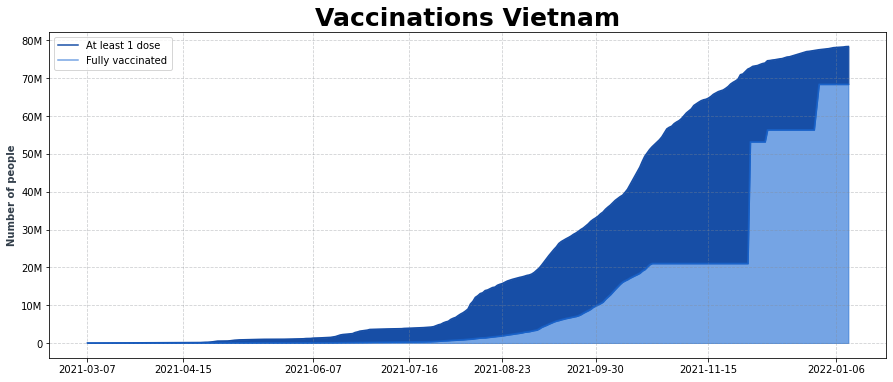

In [149]:
fig, ax = plt.subplots(figsize=(15,6))
x = date_vaccine_VN
k = 38
ax.plot(x, vaccine_VN, label='At least 1 dose', color='#174ea6')
ax.plot(x, full_vaccine_VN, label='Fully vaccinated', color='#1967d299')
ax.fill_between(x, vaccine_VN, full_vaccine_VN, color='#174ea6')
ax.fill_between(x, full_vaccine_VN, color='#1967d299')
ax.set_xticks(x[::k])
ax.set_yticks(range(0,90000000,10000000), (0, '10M', '20M', '30M', '40M', '50M', '60M', '70M', '80M'))
ax.set_title('Vaccinations Vietnam', fontsize='25', weight='bold')
ax.set_ylabel('Number of people', fontsize = 10, fontweight='black', color = '#333F4B')
ax.legend(loc='upper left')
ax.grid(alpha=.4, linestyle='--', color='#868b90')
plt.show()
fig.savefig('vaccine-Vietnam.png', facecolor='w')

In [150]:
vaccine_w = remove_nan(list_w[-2])
full_vaccine_w = remove_nan(list_w[-2], list_w[-1])
for i in range(len(full_vaccine_w)):
    if i == 0:
        full_vaccine_w[i] = 0
    else:
        if np.isnan(full_vaccine_w[i]):
            full_vaccine_w[i] = full_vaccine_w[i-1]
boosted_vaccine_w = remove_nan(list_w[-2], list_w[-3])
for i in range(len(boosted_vaccine_w)):
    if i == 0:
        boosted_vaccine_w[i] = 0
    else:
        if np.isnan(boosted_vaccine_w[i]):
            boosted_vaccine_w[i] = boosted_vaccine_w[i-1]
date_vaccine_w = remove_nan(list_w[-2], list_w[0])

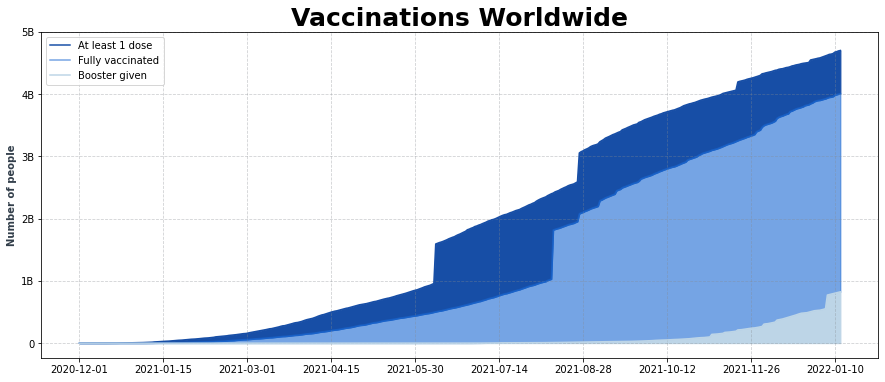

In [154]:
def vacinations(vaccine, full_vaccine, boosted_vaccine, date_vaccine, promp, k = 45, 
                yticks=range(0,6000000000,1000000000), ylables=(0, '1B', '2B', '3B', '4B', '5B')):
    fig, ax = plt.subplots(figsize=(15,6))
    x = date_vaccine
    ax.plot(x, vaccine, label='At least 1 dose', color='#174ea6')
    ax.plot(x, full_vaccine, label='Fully vaccinated', color='#1967d299')
    ax.plot(x, boosted_vaccine, label='Booster given', color='#BDD5E7')
    ax.fill_between(x, vaccine, full_vaccine, color='#174ea6')
    ax.fill_between(x, full_vaccine, boosted_vaccine, color='#1967d299')
    ax.fill_between(x,  boosted_vaccine, color='#BDD5E7')
    ax.set_xticks(x[::k])
    ax.set_yticks(yticks, ylables)
#     ax.set_xticklabels(date_vaccine[::k])
    ax.set_ylabel('Number of people', fontsize = 10, fontweight='black', color = '#333F4B')
    ax.set_title(f'Vaccinations {promp}', fontsize='25', weight='bold')
    ax.legend(loc='upper left')
    ax.grid(alpha=.4, linestyle='--', color='#868b90')
    plt.show()
    fig.savefig(f'vaccine-{promp}.png', facecolor='w')
vacinations(vaccine_w, full_vaccine_w, boosted_vaccine_w, date_vaccine_w, 'Worldwide')

In [155]:
vaccine_jp = remove_nan(list_jp[-2])
full_vaccine_jp = remove_nan(list_jp[-2], list_jp[-1])
for i in range(len(full_vaccine_jp)):
    if i == 0:
        full_vaccine_jp[i] = 0
    else:
        if np.isnan(full_vaccine_jp[i]):
            full_vaccine_jp[i] = full_vaccine_jp[i-1]
boosted_vaccine_jp = remove_nan(list_jp[-2], list_jp[-3])
for i in range(len(boosted_vaccine_jp)):
    if i == 0:
        boosted_vaccine_jp[i] = 0
    else:
        if np.isnan(boosted_vaccine_jp[i]):
            boosted_vaccine_jp[i] = boosted_vaccine_jp[i-1]
date_vaccine_jp = remove_nan(list_jp[-2], list_jp[0])

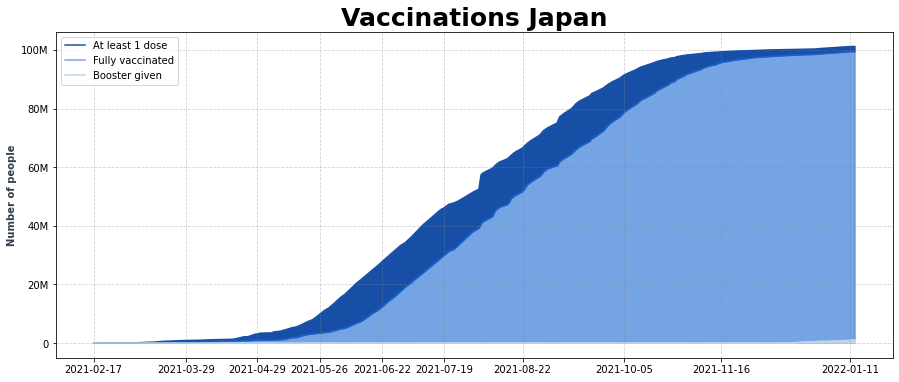

In [156]:
vacinations(vaccine_jp, full_vaccine_jp, boosted_vaccine_jp, date_vaccine_jp, 'Japan', k = 27, 
           yticks=range(0,100000001,20000000), ylables=(0, '20M', '40M', '60M', '80M', '100M'))

In [21]:
population_VN = list_vn[1][-1]
g = np.max(vaccine_VN)/population_VN*100
g2 = np.max(full_vaccine_VN)/population_VN*100
print(f'{g:.2f}% of {VN} population have received\n at least one dose of a vaccine')
print(f'{g2:.2f}% of {VN} population full vaccinated\nData until {date_vaccine_VN[-1]}')

79.88% of Vietnam population have received
 at least one dose of a vaccine
69.71% of Vietnam population full vaccinated
Data until 2022-01-11


In [22]:
population_w = list_w[1][-1]
g = np.max(vaccine_w)/population_w*100
g2 = np.max(full_vaccine_w)/population_w*100
print(f'{g:.2f}% of {W} population have received \nat least one dose of a vaccine')
print(f'{g2:.2f}% of {W} population full vaccinated\nData until {date_vaccine_w[-1]}')

59.65% of World population have received 
at least one dose of a vaccine
50.88% of World population full vaccinated
Data until 2022-01-13


In [157]:
continent = list(set(continent))

In [158]:
del(continent[0])

In [159]:
list_continent = []
for i in range(len(continent)):
    temp = []
    for j in range(length):
        temp.append(covid_data[j][country == continent[i]])
    list_continent.append(temp)

In [17]:
data_cases = [np.nanmax(list_continent[x][2]) for x in range(len(list_continent))]
data_deaths = [np.nanmax(list_continent[x][4]) for x in range(len(list_continent))]

In [18]:
color = ['#138DC2', '#3AC9B0', '#FEE5C6', '#E28FB1', '#DC4614', '#F2C935']

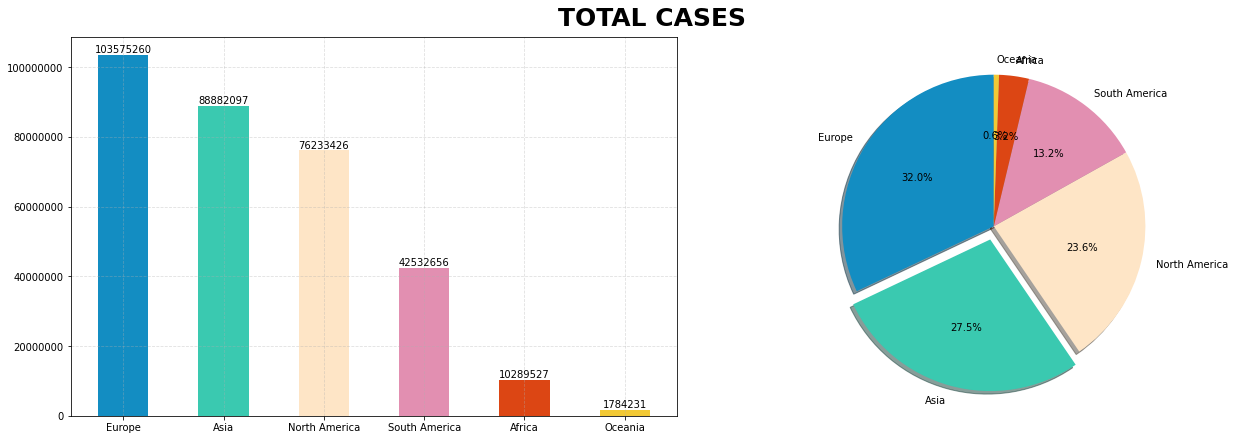

In [19]:
def plot_bar(data, promp):
    #sort reverse
    k = sorted(zip(data,continent), key=lambda x: x[0], reverse=True)
    sorted_data = [k[i][0] for i in range(len(k))]
    sorted_continent = [k[i][1] for i in range(len(k))]
    
    fig = plt.figure(figsize = (18,6), constrained_layout = True)
    ax1 = fig.add_subplot(1,2,1)
    ax1.bar(x = range(len(sorted_continent)), height = sorted_data, color = color, width = 0.5, align="center")
    ax1.bar_label(container = ax1.containers[0], padding = 0, label_type = 'edge', fmt = '%d')
    ax1.set_xticks(range(len(data)))
    ax1.set_xticklabels(sorted_continent)
    ax1.grid(alpha=.4, linestyle='--')
    ax1.ticklabel_format(style='plain', axis='y')

    ax2 = fig.add_subplot(1,2,2)
    ax2.pie(sorted_data, autopct = '%.1f%%', labels = sorted_continent, colors = color, startangle = 90, explode=(0,0.09,0,0,0,0), shadow=True)

    fig.suptitle(f'{promp}', fontsize='25', weight='bold')
    fig.savefig(f'{promp}.png', facecolor='w')
    plt.show()
plot_bar(data_cases, 'TOTAL CASES')

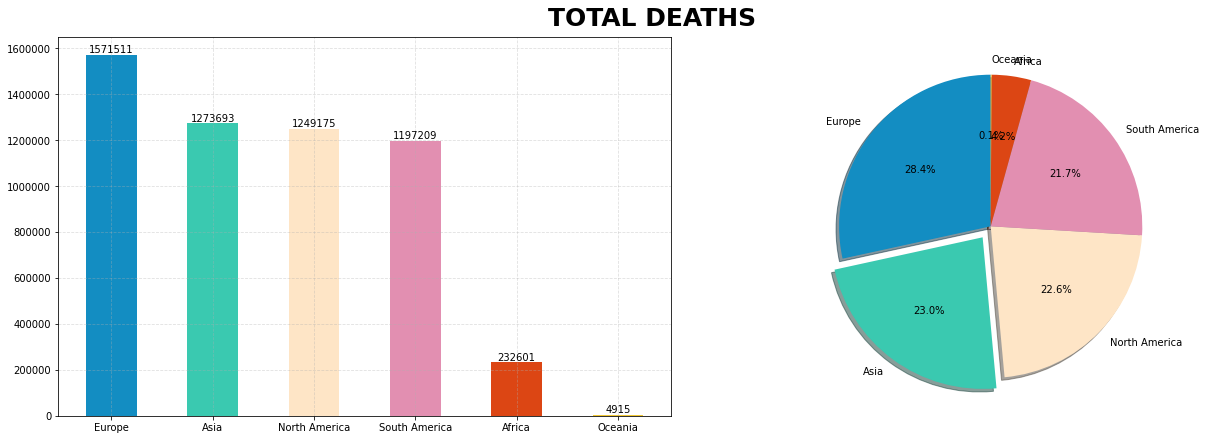

In [20]:
plot_bar(data_deaths, 'TOTAL DEATHS')

In [160]:
new_cases_VN = remove_nan(list_vn[3])
date_cases_VN = remove_nan(list_vn[3], list_vn[0])
mean_cases = [np.mean(new_cases_VN[i:i+7]) for i in range(len(new_cases_VN))]

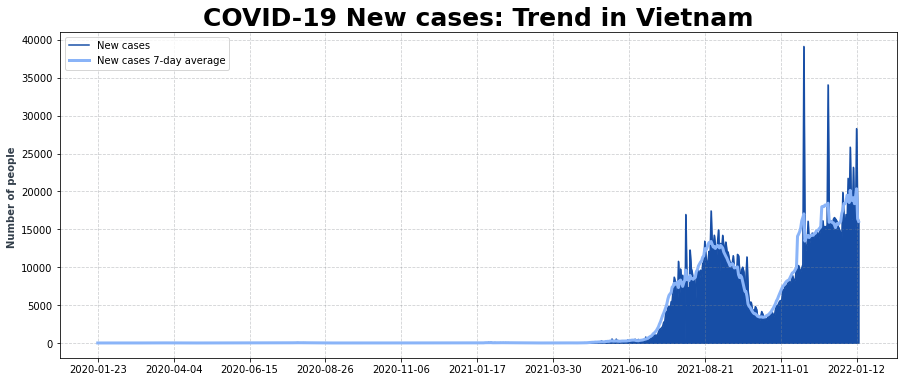

In [161]:
def covid_plot(data, date, mean,  k = 72, promp='New cases', promp2=VN, color='#174ea6', p = ''):
    fig, ax = plt.subplots(figsize=(15,6))
    x = date
    ax.plot(x, data, label=f'{promp}', color=color)
    ax.plot(x, mean, label=f'{promp} 7-day average', color='#8ab4f8', linewidth=3)
    ax.fill_between(x,  data, color=color)
    ax.set_xticks(x[::k])
    ax.set_title(f'COVID-19 {promp}: Trend in {promp2}', fontsize='25', weight='bold')
    ax.set_ylabel(f'Number of people {p}', fontsize = 10, fontweight='black', color = '#333F4B')
    ax.legend(loc='upper left')
    ax.grid(alpha=.4, linestyle='--', color='#868b90')
    fig.savefig(f'{promp2}-{promp}.png', facecolor='w', dpi = 100, bbox_inches = 'tight')
    plt.show()
covid_plot(new_cases_VN, date_cases_VN, mean_cases)

In [162]:
new_deaths_VN = remove_nan(list_vn[5])
date_deaths_VN = remove_nan(list_vn[5], list_vn[0])
mean_deaths = [np.mean(new_deaths_VN[i:i+7]) for i in range(len(new_deaths_VN))]

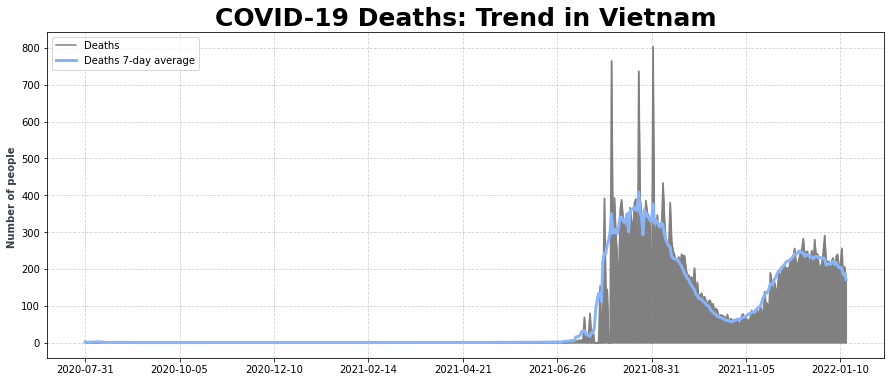

In [163]:
covid_plot(new_deaths_VN, date_deaths_VN, mean_deaths, k = 66, promp='Deaths', color='grey')

In [164]:
new_deaths_jp = remove_nan(list_jp[5])
date_deaths_jp = remove_nan(list_jp[5], list_jp[0])
mean_deaths = [np.mean(new_deaths_jp[i:i+7]) for i in range(len(new_deaths_jp))]

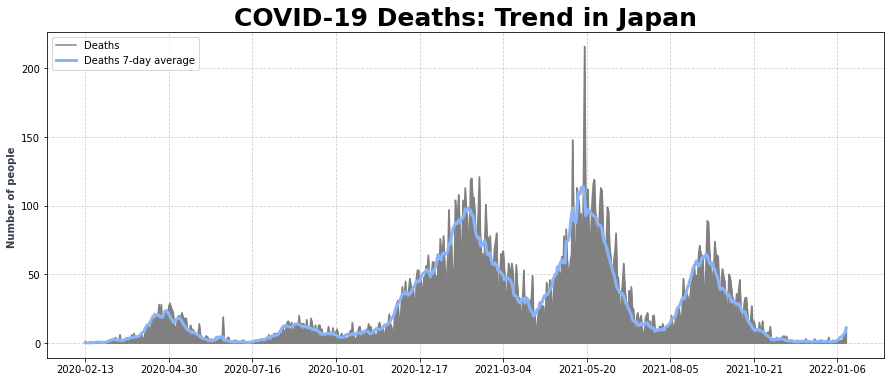

In [165]:
covid_plot(new_deaths_jp, date_deaths_jp, mean_deaths, k = 77, promp='Deaths', color='grey', promp2=JP)

In [166]:
new_deaths_w = remove_nan(list_w[5])
date_deaths_w = remove_nan(list_w[5], list_w[0])
mean_deaths = [np.mean(new_deaths_w[i:i+7]) for i in range(len(new_deaths_w))]

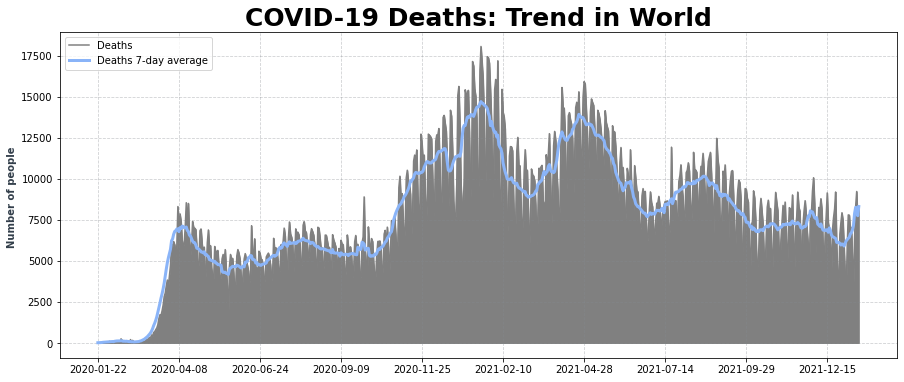

In [167]:
covid_plot(new_deaths_w, date_deaths_w, mean_deaths, k = 77, promp='Deaths', color='grey', promp2=W)

In [168]:
new_cases_jp = remove_nan(list_jp[3])
date_cases_jp = remove_nan(list_jp[3], list_jp[0])
mean_cases = [np.mean(new_cases_jp[i:i+7]) for i in range(len(new_cases_jp))]

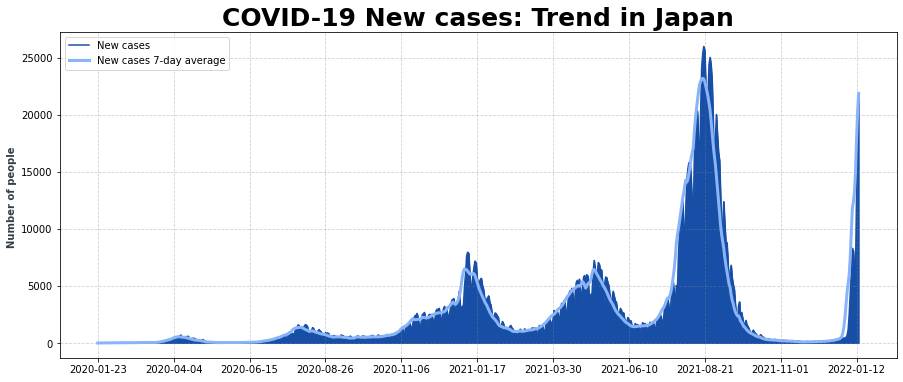

In [169]:
covid_plot(new_cases_jp, date_cases_jp, mean_cases, k = 72, promp='New cases', promp2=JP)

In [170]:
new_cases_w = remove_nan(list_w[3])
date_cases_w = remove_nan(list_w[3], list_w[0])
mean_cases = [np.mean(new_cases_w[i:i+7]) for i in range(len(new_cases_w))]

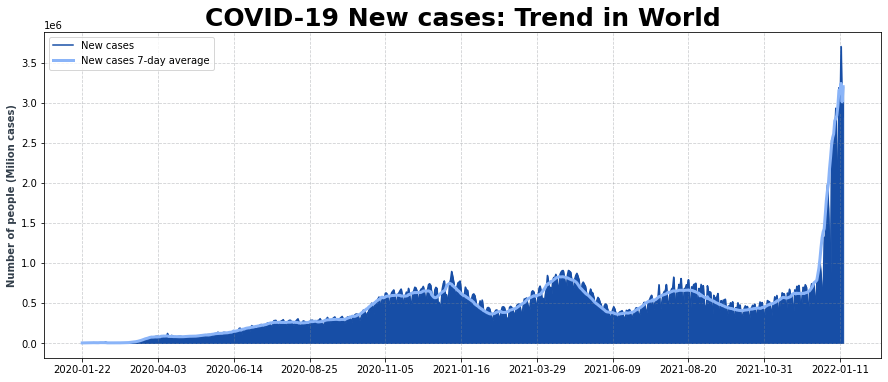

In [171]:
covid_plot(new_cases_w, date_cases_w, mean_cases, k = 72, promp='New cases', promp2=W, p='(Milion cases)')

In [172]:
total_cases_vn =  list_vn[2]
total_deaths_vn =  list_vn[4]
date_ttcases_vn = list_vn[0]

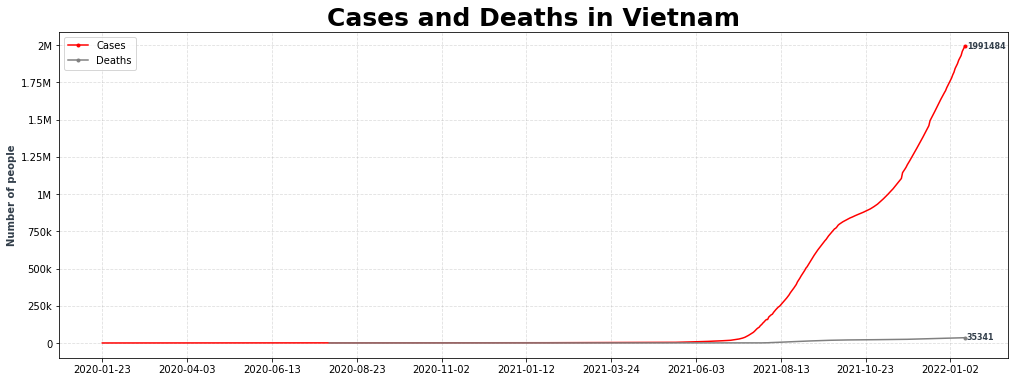

In [173]:
def case_death(total_cases, total_deaths, date_ttcases, promp, k = 71):
    fig, ax = plt.subplots(figsize=(17,6))
    x = date_ttcases
    ax.plot(x, total_cases, marker='o',  markersize = 3, color = 'red', markevery=[-1])
    ax.plot(x, total_deaths,  marker='o', color='grey', markersize = 3, markevery=[-1])
    ax.set_xticks(x[::k])
    ax.set_yticks(range(0,2000001,250000), (0, '250k', '500k', '750k', '1M', '1.25M', '1.5M', '1.75M', '2M'))
    ax.set_ylabel('Number of people', fontsize = 10, fontweight='black', color = '#333F4B')
    start, end = ax.get_xlim()

    end_date =  x[-1]
    case_value = []
    case_value.append(total_cases[-1])
    case_value.append(total_deaths[-1])

    for val in case_value:
        ax.annotate(int(val), # this is the text
                     (end_date,val), # this is the point to label
                     color = '#333F4B',fontsize = 8, weight = 'bold',
                     textcoords = "offset points", # how to position the text
                     xytext = (2,-2), # distance from text to points (x,y)
                     ha = 'left')

    ax.legend(['Cases', 'Deaths'])
    ax.grid(alpha=.4, linestyle='--')
    ax.set_title(f'Cases and Deaths in {promp}', fontsize='25', weight='bold')
    fig.savefig(f'cases-deaths-{promp}.png', facecolor='w', dpi = 100, bbox_inches = 'tight')
    plt.show()
case_death(total_cases_vn, total_deaths_vn, date_ttcases_vn, VN)

In [174]:
total_cases_jp =  list_jp[2]
total_deaths_jp =  list_jp[4]
date_ttcases_jp = list_jp[0]

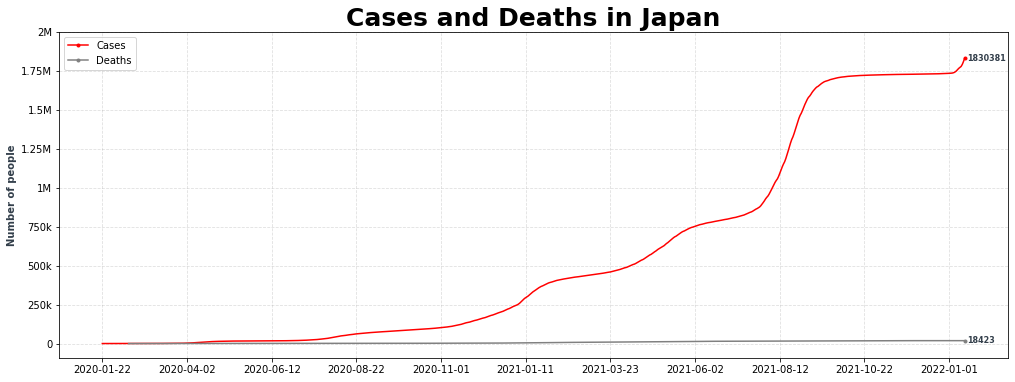

In [175]:
case_death(total_cases_jp, total_deaths_jp, date_ttcases_jp, JP)

In [195]:
total_cases_tl, total_cases_i, total_cases_mal, total_cases_cam, total_cases_man =  list_tl[2], list_i[2], list_mal[2], list_cam[2], list_man[2]
date_ttcases_tl, date_ttcases_i, date_ttcases_mal, date_ttcases_cam, date_ttcases_man = list_tl[0], list_i[0], list_mal[0], list_cam[0], list_man[0]

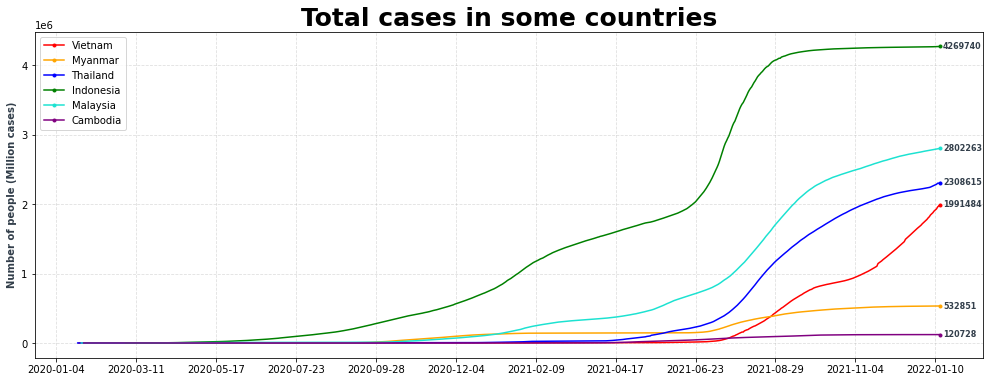

In [196]:
fig, ax = plt.subplots(figsize=(17,6))
x1 = date_ttcases_vn
x2 = date_ttcases_man
x3 = date_ttcases_tl
x4 = date_ttcases_i
x5 = date_ttcases_mal
x6 = date_ttcases_cam
k = 67
ax.plot(x1, total_cases_vn, marker='o',  markersize = 3, color = 'red', markevery=[-1])
ax.plot(x2, total_cases_man,  marker='o', color='orange', markersize = 3, markevery=[-1])
ax.plot(x3, total_cases_tl,  marker='o', color='b', markersize = 3, markevery=[-1])
ax.plot(x4, total_cases_i,  marker='o', color='g', markersize = 3, markevery=[-1])
ax.plot(x5, total_cases_mal,  marker='o', color='#1CE2D1', markersize = 3, markevery=[-1])
ax.plot(x6, total_cases_cam,  marker='o', color='purple', markersize = 3, markevery=[-1])
ax.set_xticks(x3[::k])
# ax.set_yticks(range(0,2000001,250000), (0, '250k', '500k', '750k', '1M', '1.25M', '1.5M', '1.75M', '2M'))
# ax.set_xticklabels(date_ttcases_tl[::k])
start, end = ax.get_xlim()

end_date =  [x1[-1], x2[-1], x3[-1], x4[-1], x5[-1], x6[-1]]
case_value = []
case_value.append(total_cases_vn[-1])
case_value.append(total_cases_man[-1])
case_value.append(total_cases_tl[-1])
case_value.append(total_cases_i[-1])
case_value.append(total_cases_mal[-1])
case_value.append(total_cases_cam[-1])

for i in range(6):
    ax.annotate(int(case_value[i]), # this is the text
                 (end_date[i],case_value[i]), # this is the point to label
                 color = '#333F4B',fontsize = 8, weight = 'bold',
                 textcoords = "offset points", # how to position the text
                 xytext = (3,-2), # distance from text to points (x,y)
                 ha = 'left')

ax.legend([VN, MAN, TL, I, MAL, CAM], loc='upper left')
ax.set_ylabel(f'Number of people (Million cases)', fontsize = 10, fontweight='black', color = '#333F4B')
ax.grid(alpha=.4, linestyle='--')
ax.set_title('Total cases in some countries', fontsize='25', weight='bold')
fig.savefig(f'cases-contries.png', facecolor='w', dpi = 100, bbox_inches = 'tight')
plt.show()

In [79]:
def test(data):
    new_tests = remove_nan(data[6])
    possitive = remove_nan(data[6], data[7])
    for i in range(len(possitive)):
        if i == 0:
            possitive[i] = 0
        else:
            if np.isnan(possitive[i]):
                possitive[i] = possitive[i-1]
    possitive_copy = new_tests * possitive
    date_tests = remove_nan(data[6], data[0])
    return new_tests, possitive_copy, date_tests, possitive

In [81]:
new_tests_jp, possitive_jp, date_tests_jp, possitive_jp_per = test(list_jp)

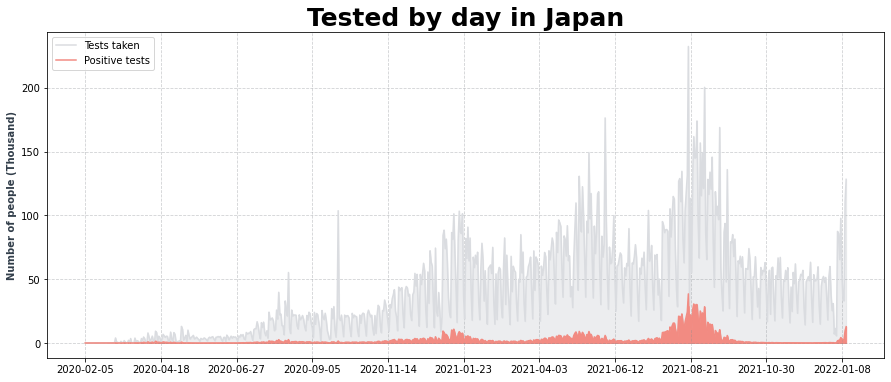

In [82]:
 def test_plot(new_tests, possitive, date_tests, promp, k = 70):
    fig, ax = plt.subplots(figsize=(15,6))
    x = range(len(date_tests))
    y1 = new_tests/1000
    y2 = possitive/1000
    ax.plot(x, y1, label='Tests taken', color='#dadce0')
    ax.plot(x, y2, label='Positive tests', color='#f28b82')
    ax.fill_between(x, y1, y2, color='#dadce080')
    ax.fill_between(x, y2, color='#f28b82')
    ax.set_xticks(x[::k], date_tests[::k])
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_xticklabels(date_tests[::k])
    ax.set_ylabel('Number of people (Thousand)', fontsize = 10, fontweight='black', color = '#333F4B')
    ax.set_title(f'Tested by day in {promp}', fontsize='25', weight='bold')
    ax.legend(loc='upper left')
    ax.grid(alpha=.4, linestyle='--', color='#868b90')
    plt.show()
    fig.savefig(f'tests-{promp}.png', facecolor='w')
test_plot(new_tests_jp, possitive_jp, date_tests_jp, JP)

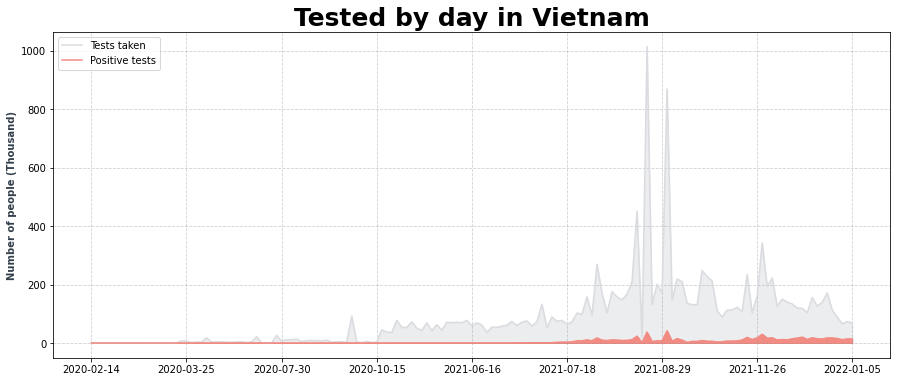

In [83]:
new_tests_vn, possitive_vn, date_tests_vn, possitive_vn_per = test(list_vn)
test_plot(new_tests_vn, possitive_vn, date_tests_vn, VN, k=19)

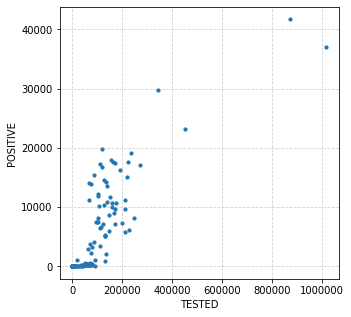

In [43]:
def compare_tests(new_tests, possitive, promp):    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(new_tests, possitive, s=10)
    ax.ticklabel_format(style='plain', axis='x')
    ax.grid(alpha=.4, linestyle='--', color='#868b90')
    ax.set_xlabel('TESTED')
    ax.set_ylabel('POSITIVE')
    fig.savefig(f'scatter-{promp}.png', dpi = 100, bbox_inches = 'tight',  facecolor='w')
    plt.show()
compare_tests(new_tests_vn, possitive_vn, VN)

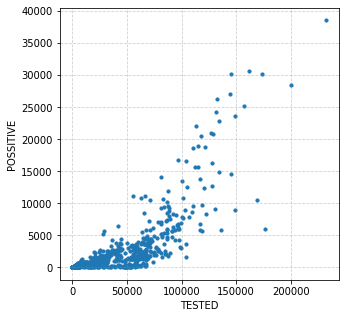

In [660]:
compare_tests(new_tests_jp, possitive_jp, JP)

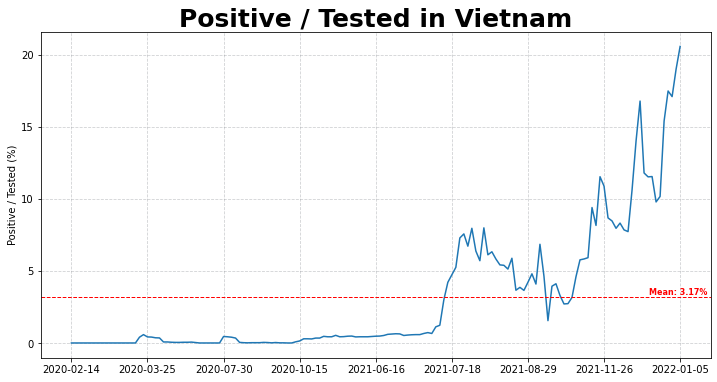

In [44]:
def possitive_tested(possitive, date, promp, k = 19):
    fig, ax = plt.subplots(figsize=(12,6))
    y = possitive * 100
    h = np.mean(y)
    x = range(len(date))
    ax.plot(x, y)
    ax.axhline(h, color='r', linestyle='dashed', linewidth=1)
    end_date =  x[-2]
    ax.annotate(f'Mean: {h:.2f}%', (end_date, h),
                 color = 'r', fontsize = 8, weight = 'bold',
                 textcoords = "offset points", # how to position the text
                 xytext = (2,3), # distance from text to points (x,y)
                 ha = 'center')
    ax.set_xticks(x[::k], date[::k])
    ax.set_xticklabels(date[::k])
    ax.ticklabel_format(style='plain', axis='y')
    ax.set_ylabel('Positive / Tested (%)')
    ax.grid(alpha=.4, linestyle='--', color='#868b90')
    ax.set_title(f'Positive / Tested in {promp}', fontsize='25', weight='bold')
    fig.savefig(f'pt-{promp}.png', facecolor='w')
    plt.show()
possitive_tested(possitive_vn_per, date_tests_vn, VN)

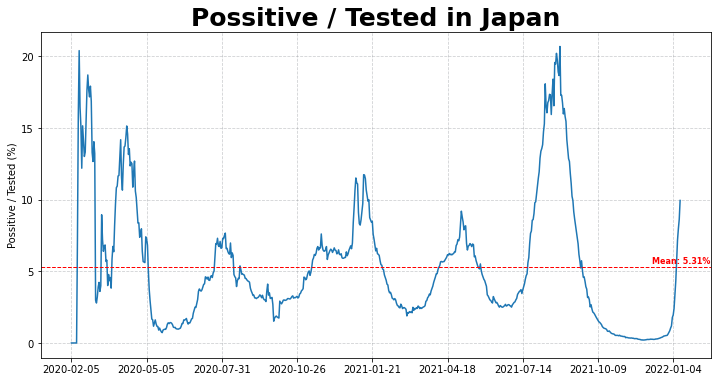

In [712]:
possitive_tested(possitive_jp_per, date_tests_jp, JP, k=87)